In [1]:
from mpi4py import MPI
import dolfinx
import ufl
import festim as F


my_model = F.HydrogenTransportProblem()

nx = ny = 30
my_model.mesh = F.Mesh(
    dolfinx.mesh.create_unit_square(MPI.COMM_WORLD, nx, ny),
)


class AnisotropicMaterial(F.Material):
    def __init__(self, D):
        self.D = D

    # need to overwrite this method since it calls D_0 and E_D
    def get_diffusion_coefficient(self, mesh, temperature, species=None):
        return self.D


Dxx = 10
Dyy = 1
D = ufl.as_tensor([[Dxx, 0], [0, Dyy]])
my_mat = AnisotropicMaterial(D=D)

my_subdomain = F.VolumeSubdomain(id=1, material=my_mat)
boundary = F.SurfaceSubdomain(id=1)
my_model.subdomains = [my_subdomain, boundary]

mobile_H = F.Species("H")
my_model.species = [mobile_H]

my_model.temperature = 500.0

my_model.boundary_conditions = [
    F.DirichletBC(subdomain=boundary, value=0, species=mobile_H)
]

my_model.sources = [F.ParticleSource(volume=my_subdomain, species=mobile_H, value=1)]

my_model.exports = [F.XDMFExport("mobile_concentration.xdmf", field=mobile_H)]

my_model.settings = F.Settings(
    atol=1e-10,
    rtol=1e-10,
    max_iterations=30,
    transient=False,
)

my_model.initialise()
my_model.run()

  import tqdm.autonotebook



In [2]:
import pyvista
from dolfinx.plot import vtk_mesh

pyvista.OFF_SCREEN = False


def plot_result(u, title="Concentration"):
    pyvista.start_xvfb()
    pyvista_cells, cell_types, geometry = vtk_mesh(u.function_space)
    grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)

    grid.point_data["u"] = u.x.array
    grid.set_active_scalars("u")

    plotter = pyvista.Plotter()
    plotter.add_text(title, position="upper_edge", font_size=14, color="black")
    plotter.add_mesh(grid, show_edges=False)
    plotter.view_xy()
    plotter.add_mesh(grid.contour(), color="white", line_width=1)
    if not pyvista.OFF_SCREEN:
        plotter.show()
    else:
        figure = plotter.screenshot("multiple_dirichlet.png")


No module named 'trame'

Falling back to a static output.
  warnings.warn(



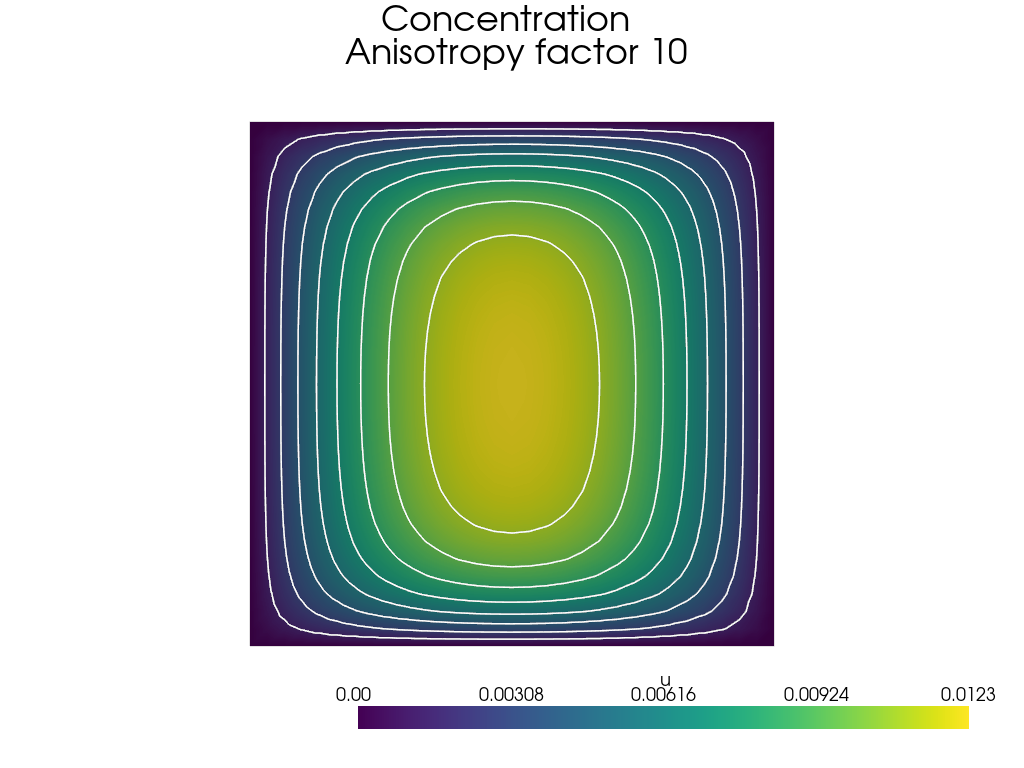

In [3]:
mobile_concentration = my_model.u

plot_result(
    mobile_concentration, title=f"Concentration \n Anisotropy factor {Dxx/Dyy:.0f}"
)


No module named 'trame'

Falling back to a static output.
  warnings.warn(



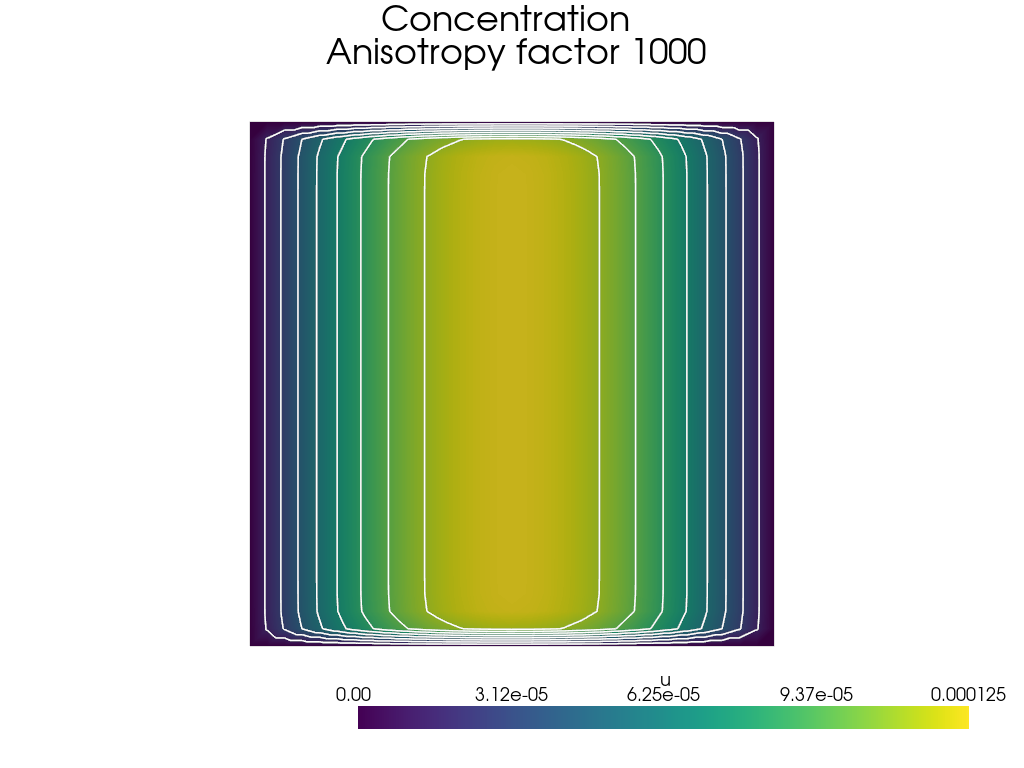

In [4]:
Dxx = 1000
Dyy = 1
my_mat.D = ufl.as_tensor([[Dxx, 0], [0, Dyy]])

my_model.exports[0].writer.close()
my_model.initialise()
my_model.run()

mobile_concentration = my_model.u

plot_result(
    mobile_concentration, title=f"Concentration \n Anisotropy factor {Dxx/Dyy:.0f}"
)


No module named 'trame'

Falling back to a static output.
  warnings.warn(



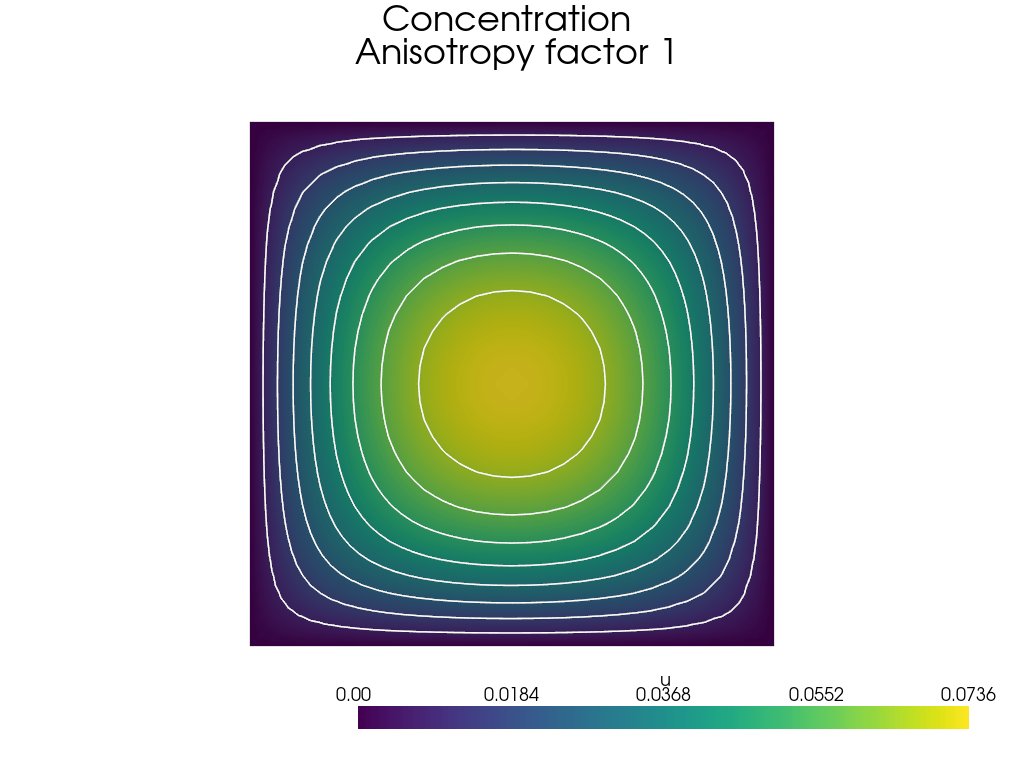

In [5]:
Dxx = 1
Dyy = 1
my_mat.D = ufl.as_tensor([[Dxx, 0], [0, Dyy]])

my_model.exports[0].writer.close()
my_model.initialise()
my_model.run()

mobile_concentration = my_model.u

plot_result(
    mobile_concentration, title=f"Concentration \n Anisotropy factor {Dxx/Dyy:.0f}"
)